# Saving and Retrieving a Pre-trained model

In this example we will use the [Support Vector Machine Machine Learning Algorithm](https://en.wikipedia.org/wiki/Support_vector_machine). The `svm()` function is defined within the `e1071`package, thus, we first need to load it:

In [18]:
library("e1071")

## Loading the Data

We will use the [Iris dataset](https://archive.ics.uci.edu/dataset/53/iris) for this classification problem. Thi is a small classic dataset. One of the earliest datasets used for evaluation of classification methodologies.

The dataset is composed of the following variables:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class: 
  - Iris Setosa
  - Iris Versicolour
  - Iris Virginica

In [19]:
data(iris)

In [20]:
str(iris) 

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [21]:
head(iris,5)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa


We will split the dataset into two partitions, one for training and the other for testing:

In [22]:
train = sample(1:nrow(iris), round(nrow(iris)*0.75)) 

In [23]:
train_iris = iris[train, ]
test_iris = iris[-train,]

## Model Building

SVM can use [several kernels](https://www.rdocumentation.org/packages/e1071/versions/1.7-13/topics/svm). For our example we will use the most simple one, the `linear`.

In [24]:
svm1 = svm(Species ~., data = train_iris, kernel = 'linear')

In [25]:
summary(svm1)


Call:
svm(formula = Species ~ ., data = train_iris, kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.25 

Number of Support Vectors:  24

 ( 12 10 2 )


Number of Classes:  3 

Levels: 
 setosa versicolor virginica




We will create a plot to show the decision boundary for this classifier

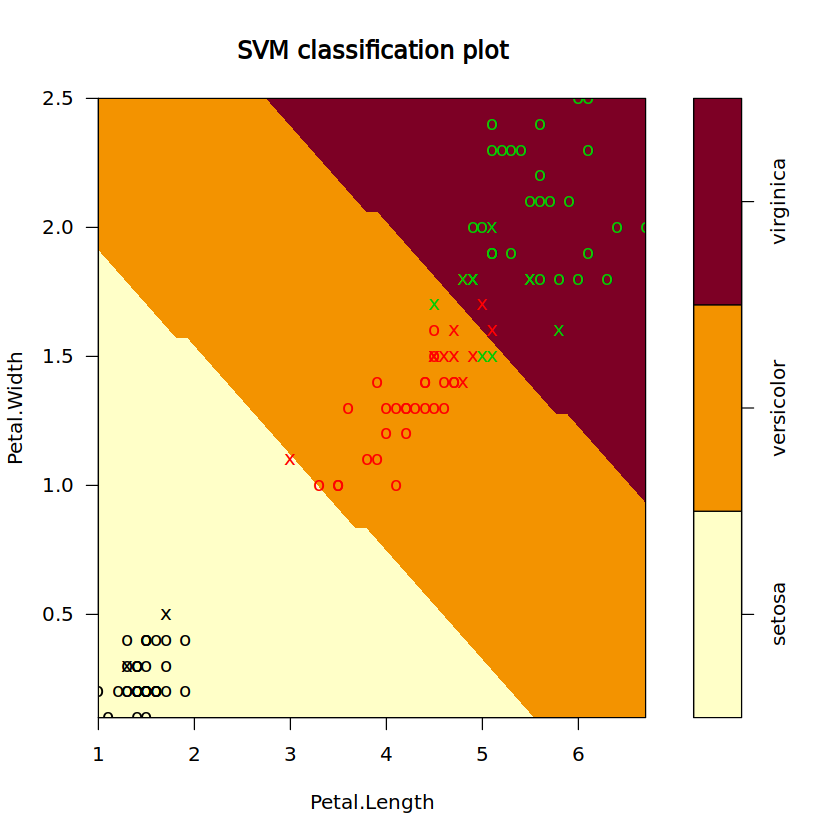

In [26]:
plot(svm1, train_iris, Petal.Width ~ Petal.Length, slice = list(Sepal.Width=3, Sepal.Length=4))

Visualizing the effect of the predictor variables Petal.Length and Petal.Width on the response while keeping Sepal.Width and Sepal.Length constant at the specified values.

Now it is time to evaluate the performance level of our classifier

In [27]:
pred = predict(svm1, test_iris)

In [28]:
library(caret)

In [29]:
confusionMatrix(test_iris$Species, pred)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         11          0         0
  versicolor      0         13         0
  virginica       0          0        14

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9075, 1)
    No Information Rate : 0.3684     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           1.0000
Specificity                 1.0000            1.0000           1.0000
Pos Pred Value              1.0000            1.0000           1.0000
Neg Pred Value              1.0000            1.0000           1.0000
Prevalence                  0.2895            

## Save model to File

We are going to use the [RDS](https://www.r-bloggers.com/2016/12/remember-to-use-the-rds-format/) format to save our pre-trained model object. This format compacts the object into a file.

In [30]:
saveRDS(svm1, "model.rds")

## Reading a pre-trained model

Now, if we want to load a pre-trained model saved in `RDS` format we have to run:

In [31]:
my_model <- readRDS("model.rds")

... and from the pre-trained model we can do inferences

In [32]:
pred2 <- predict(my_model, test_iris)

In [33]:
confusionMatrix(test_iris$Species, pred2)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         11          0         0
  versicolor      0         13         0
  virginica       0          0        14

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9075, 1)
    No Information Rate : 0.3684     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           1.0000
Specificity                 1.0000            1.0000           1.0000
Pos Pred Value              1.0000            1.0000           1.0000
Neg Pred Value              1.0000            1.0000           1.0000
Prevalence                  0.2895            